# ggcorrplot : Visualization of a correlation matrix using plotnine

In this notebook, we’ll describe the python package **ggcorrplot** for displaying easily a correlation matrix using ‘plotnine’.

## ggcorrplot main features

It provides a solution for **reordering** the correlation pandas datafrme and displays the **significance level** on the correlogram. It includes also a function for computing a pandas dataframe of **correlation p-values**.

## Installation and loading

ggcorrplot can be installed from python as follow :

> pip install ggcorrplot

## Getting started

### Compute a correlation matrix

the [mtcars](https://plotnine.org/reference/mtcars.html#plotnine.data.mtcars) data set will be used in the following python code. The function **cor_pmat** [in **ggcorrplot**] computes a matrix of correlation p-values

In [1]:
# Load mtcars dataset form plotnine
from plotnine.data import mtcars
mtcars.head(6)

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1


We set name as rownames

In [2]:
# Set name as index
mtcars = mtcars.set_index("name")
mtcars.head(6)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
name,,,,,,,,,,,
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1


In [3]:
# Compute a correlation matrix
corr = mtcars.corr().round(1)
corr.head(6)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.0,-0.9,-0.8,-0.8,0.7,-0.9,0.4,0.7,0.6,0.5,-0.6
cyl,-0.9,1.0,0.9,0.8,-0.7,0.8,-0.6,-0.8,-0.5,-0.5,0.5
disp,-0.8,0.9,1.0,0.8,-0.7,0.9,-0.4,-0.7,-0.6,-0.6,0.4
hp,-0.8,0.8,0.8,1.0,-0.4,0.7,-0.7,-0.7,-0.2,-0.1,0.7
drat,0.7,-0.7,-0.7,-0.4,1.0,-0.7,0.1,0.4,0.7,0.7,-0.1
wt,-0.9,0.8,0.9,0.7,-0.7,1.0,-0.2,-0.6,-0.7,-0.6,0.4


In [4]:
# Compute a matrix of correlation p-values
from ggcorrplot import cor_pmat
p_mat = cor_pmat(mtcars)
p_mat.head(6)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,0.000000e+00,6.112687e-10,9.380327e-10,1.787835e-07,0.000018,1.293959e-10,0.017082,3.415937e-05,0.000285,0.005401,1.084446e-03
cyl,6.112687e-10,0.000000e+00,1.802838e-12,3.477861e-09,0.000008,1.217567e-07,0.000366,1.843018e-08,0.002151,0.004173,1.942340e-03
disp,9.380327e-10,1.802838e-12,0.000000e+00,7.142679e-08,0.000005,1.222320e-11,0.013144,5.235012e-06,0.000366,0.000964,2.526789e-02
hp,1.787835e-07,3.477861e-09,7.142679e-08,0.000000e+00,0.009989,4.145827e-05,0.000006,2.940896e-06,0.179831,0.493012,7.827810e-07
drat,1.776240e-05,8.244636e-06,5.282022e-06,9.988772e-03,0.000000,4.784260e-06,0.619583,1.167553e-02,0.000005,0.000008,6.211834e-01
wt,1.293959e-10,1.217567e-07,1.222320e-11,4.145827e-05,0.000005,0.000000e+00,0.338868,9.798492e-04,0.000011,0.000459,1.463861e-02


### Correlation matrix visualization

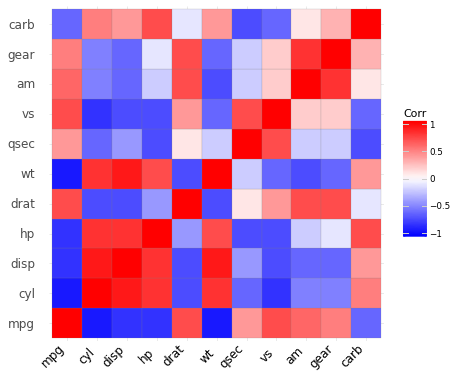

In [5]:
from ggcorrplot import ggcorrplot
# Visualize the correlation matrix
# --------------------------------
# method = "square" (default)
p = ggcorrplot(corr)
print(p)

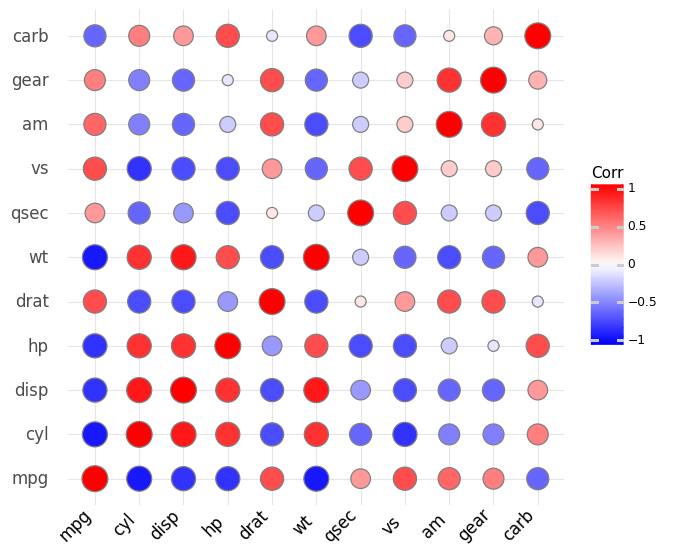

In [6]:
# method = "circle"
p = ggcorrplot(corr,method = "circle")
print(p)

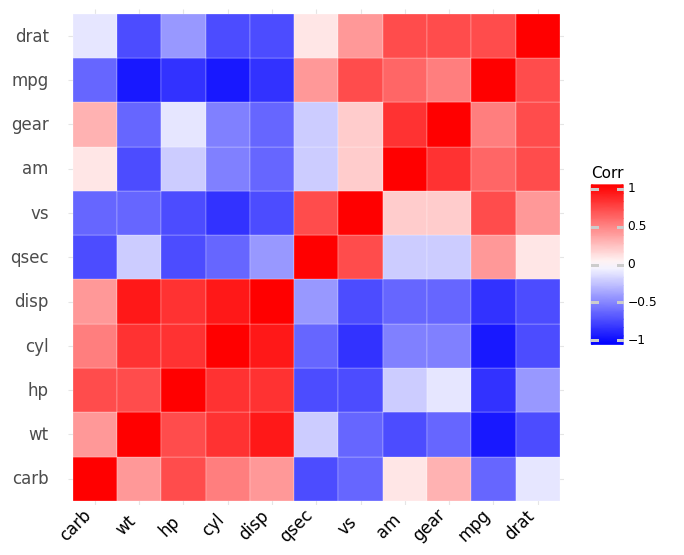

In [7]:
# Reordering the correlation matrix
# --------------------------------
# using hierarchical clustering
p = ggcorrplot(corr,hc_order = True, outline_color = "white")
print(p)

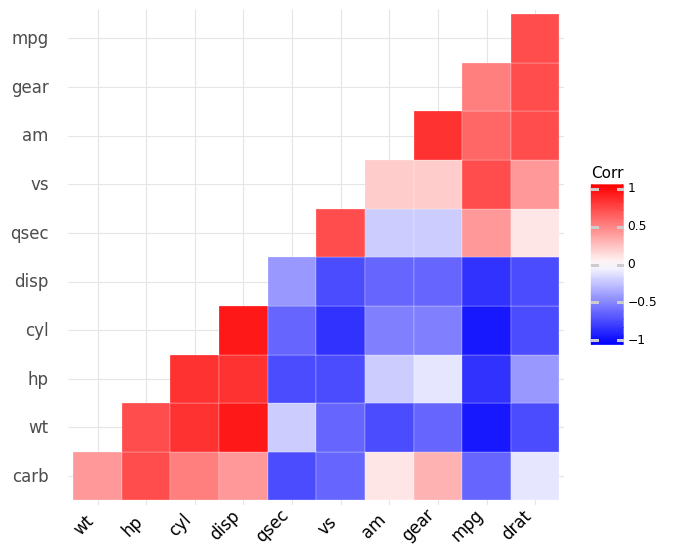

In [8]:
# Types of correlogram layout
# --------------------------------
# Get the lower triangle
p = ggcorrplot(corr, hc_order = True, type = "lower",outline_color = "white")
print(p)

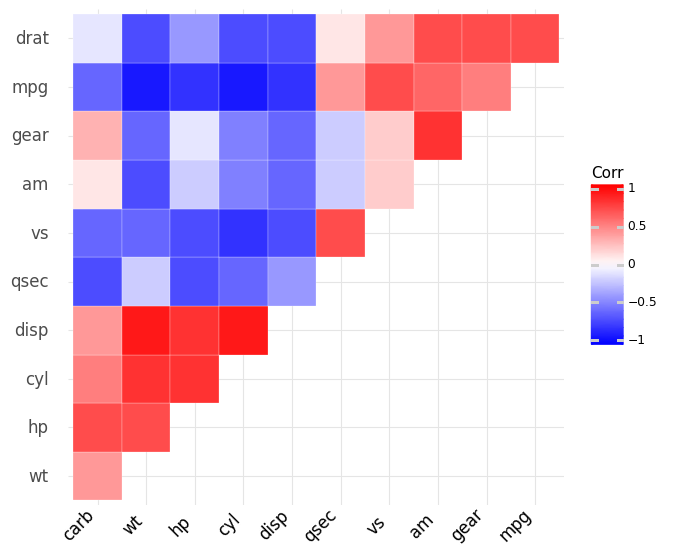

In [9]:
# Get the upper triangle
p = ggcorrplot(corr, hc_order = True, type = "upper",outline_color = "white")
print(p)

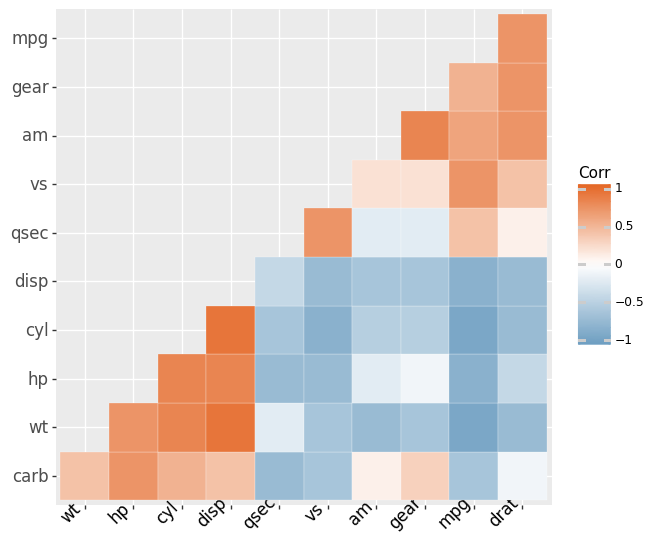

In [10]:
# Change colors and theme
# --------------------------------
# Argument colors
import plotnine as pn
p = ggcorrplot(corr, hc_order = True, type = "lower",outline_color = "white",ggtheme = pn.theme_gray(),colors = ("#6D9EC1", "white", "#E46726"))
print(p)

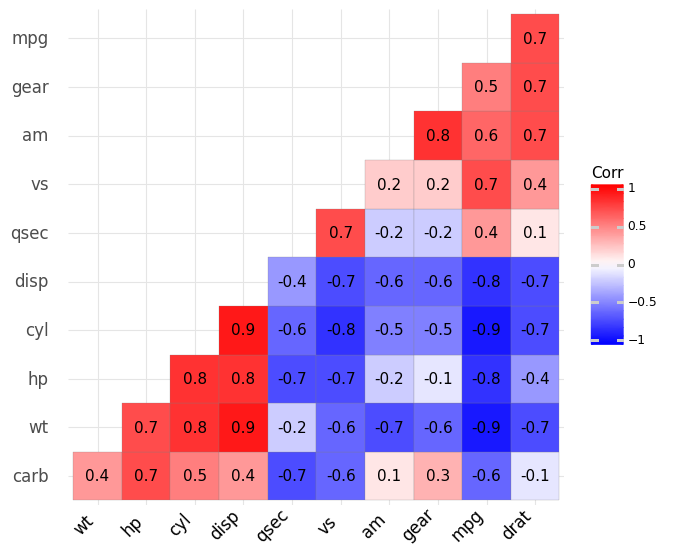

In [11]:
# Add correlation coefficients
# --------------------------------
# argument label = True
p = ggcorrplot(corr, hc_order = True, type = "lower",label = True)
print(p)

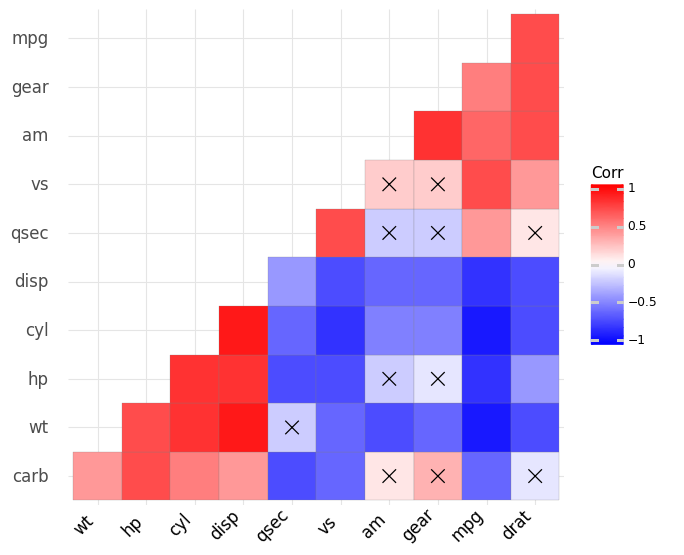

In [12]:
# Add correlation significance level
# --------------------------------
# Argument p.mat
# Barring the no significant coefficient
p = ggcorrplot(corr, hc_order = True,type = "lower", p_mat = p_mat)
print(p)

d:\Bureau\PythonProject\packages\ggcorrplot\ggcorrplot\ggcorrplot.py:344: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value ' ' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.


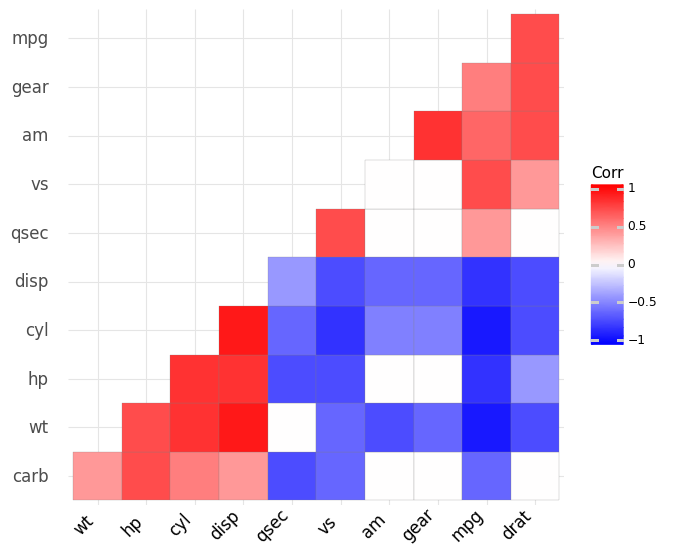

In [13]:
# Leave blank on no significant coefficient
p = ggcorrplot(corr, p_mat = p_mat, hc_order = True,type = "lower", insig = "blank")
print(p)

## Using original data

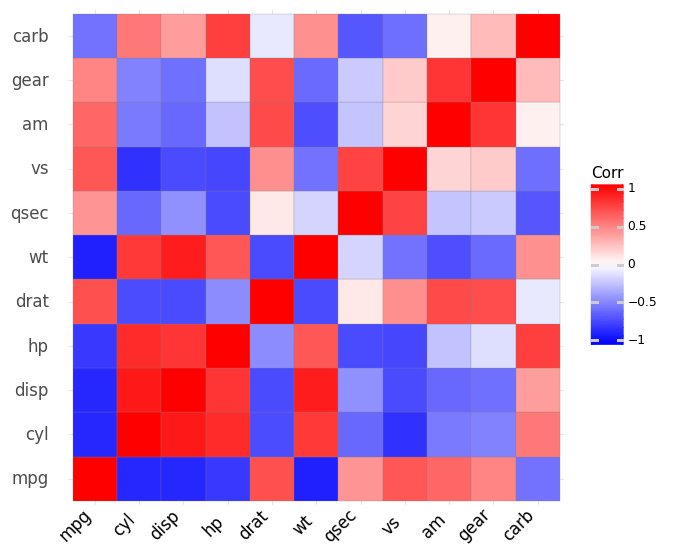

In [14]:
p = ggcorrplot(mtcars,matrix_type="completed")
print(p)